# Importing libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.utils import to_categorical
import keras

In [2]:
dataset= pd.read_csv("wustl_iiot_2021.csv",low_memory=False)

In [5]:
dataset.shape

(1194464, 49)

# Data Preprocessing

In [6]:
dataset= dataset.drop(columns=['StartTime', 'LastTime', 'SrcAddr', 'DstAddr', 'sIpId', 'dIpId','Traffic'])

In [7]:
dataset.shape

(1194464, 42)

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1194464 entries, 0 to 1194463
Data columns (total 42 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Mean        1194464 non-null  int64  
 1   Sport       1194464 non-null  int64  
 2   Dport       1194464 non-null  int64  
 3   SrcPkts     1194464 non-null  int64  
 4   DstPkts     1194464 non-null  int64  
 5   TotPkts     1194464 non-null  int64  
 6   DstBytes    1194464 non-null  int64  
 7   SrcBytes    1194464 non-null  int64  
 8   TotBytes    1194464 non-null  int64  
 9   SrcLoad     1194464 non-null  float64
 10  DstLoad     1194464 non-null  float64
 11  Load        1194464 non-null  float64
 12  SrcRate     1194464 non-null  float64
 13  DstRate     1194464 non-null  float64
 14  Rate        1194464 non-null  float64
 15  SrcLoss     1194464 non-null  int64  
 16  DstLoss     1194464 non-null  int64  
 17  Loss        1194464 non-null  int64  
 18  pLoss       1194464 no

In [9]:
dataset.isna().sum()

Mean          0
Sport         0
Dport         0
SrcPkts       0
DstPkts       0
TotPkts       0
DstBytes      0
SrcBytes      0
TotBytes      0
SrcLoad       0
DstLoad       0
Load          0
SrcRate       0
DstRate       0
Rate          0
SrcLoss       0
DstLoss       0
Loss          0
pLoss         0
SrcJitter     0
DstJitter     0
SIntPkt       0
DIntPkt       0
Proto         0
Dur           0
TcpRtt        0
IdleTime      0
Sum           0
Min           0
Max           0
sDSb          0
sTtl          0
dTtl          0
SAppBytes     0
DAppBytes     0
TotAppByte    0
SynAck        0
RunTime       0
sTos          0
SrcJitAct     0
DstJitAct     0
Target        0
dtype: int64

In [10]:
dataset.drop_duplicates(subset=None, keep="first", inplace=True)
dataset.duplicated().sum()


0

In [11]:
dataset['Target'].value_counts()

Target
0    1106747
1      87014
Name: count, dtype: int64

In [14]:
dataset.Target.unique()

array([0, 1], dtype=int64)

In [15]:
X=dataset.drop(['Target'],axis=1)
y=dataset['Target']
dataset=0

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
X=0
y=0

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [22]:
X_train.shape

(955008, 41)

# Vanilla Autoencoder Model

In [23]:
import tensorflow as tf
from keras.layers import Dense, Dropout, Activation

In [24]:
input_dim = X_train.shape[1]

In [25]:
input_vanilla = tf.keras.Input(shape=(input_dim,), name='input_vanilla')
encoded_vanilla = Dense(128, activation='relu', name='encode1_vanilla')(input_vanilla)
encoded_vanilla = Dense(64, activation='relu', name='encode2_vanilla')(encoded_vanilla)
encoded_vanilla = Dense(32, activation='relu', name='latent_vanilla')(encoded_vanilla)

decoded_vanilla = Dense(64, activation='relu', name='decode1_vanilla')(encoded_vanilla)
decoded_vanilla = Dense(128, activation='relu', name='decode2_vanilla')(decoded_vanilla)
output_vanilla = Dense(input_dim, activation='sigmoid', name='output_vanilla')(decoded_vanilla)



In [26]:
vanilla = tf.keras.Model(input_vanilla, output_vanilla)

vanilla.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_vanilla (InputLayer)           │ (None, 41)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encode1_vanilla (Dense)              │ (None, 128)                 │           5,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encode2_vanilla (Dense)              │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ latent_vanilla (Dense)               │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decode1_vanilla (Dense)              │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decode2_vanilla (Dense)              │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_vanilla (Dense)               │ (None, 41)                  │           5,289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,433 (122.79 KB)

 Trainable params: 31,433 (122.79 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
vanilla.compile(optimizer='adam', loss='mean_squared_error')

In [28]:
#EarlyStopping callback
early_stopping_callback= keras.callbacks.EarlyStopping(monitor='loss',patience=5,baseline=None,restore_best_weights=True)

# model_checkpoint_callback
checkpoint_filepath = 'vanillamodel_wustl_iiot.keras'
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,monitor='loss',mode='min',save_best_only=True)

callbacks = [early_stopping_callback, model_checkpoint_callback]
#train with both callbacks
history=vanilla.fit(X_train, X_train,epochs=100,batch_size=32, callbacks=[callbacks],verbose=1)

print("Number of epochs run:", len(history.history['loss']))



Epoch 1/100
29844/29844 ━━━━━━━━━━━━━━━━━━━━ 75s 2ms/step - loss: 0.0020
Epoch 2/100
29844/29844 ━━━━━━━━━━━━━━━━━━━━ 80s 2ms/step - loss: 1.3567e-05
Epoch 3/100
29844/29844 ━━━━━━━━━━━━━━━━━━━━ 84s 2ms/step - loss: 8.9253e-06
Epoch 4/100
29844/29844 ━━━━━━━━━━━━━━━━━━━━ 83s 2ms/step - loss: 7.9546e-06
Epoch 5/100
29844/29844 ━━━━━━━━━━━━━━━━━━━━ 71s 2ms/step - loss: 5.8315e-06
Epoch 6/100
29844/29844 ━━━━━━━━━━━━━━━━━━━━ 83s 2ms/step - loss: 5.3090e-06
Epoch 7/100
29844/29844 ━━━━━━━━━━━━━━━━━━━━ 85s 3ms/step - loss: 5.2698e-06
Epoch 8/100
29844/29844 ━━━━━━━━━━━━━━━━━━━━ 760s 25ms/step - loss: 4.7456e-06
Epoch 9/100
29844/29844 ━━━━━━━━━━━━━━━━━━━━ 76s 3ms/step - loss: 4.3710e-06
Epoch 10/100
29844/29844 ━━━━━━━━━━━━━━━━━━━━ 73s 2ms/step - loss: 3.7351e-06
Epoch 11/100
29844/29844 ━━━━━━━━━━━━━━━━━━━━ 84s 3ms/step - loss: 3.8888e-06
Epoch 12/100
29844/29844 ━━━━━━━━━━━━━━━━━━━━ 74s 2ms/step - loss: 3.4467e-06
Epoch 13/100
29844/29844 ━━━━━━━━━━━━━━━━━━━━ 73s 2ms/step - loss: 3.3804e-

In [30]:
vanilla.evaluate(X_test,X_test)

7462/7462 ━━━━━━━━━━━━━━━━━━━━ 5s 675us/step - loss: 1.5289e-06


1.8023978327619261e-06

In [32]:
for layer in vanilla.layers:
    layer.trainable =False

vanilla.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_vanilla (InputLayer)           │ (None, 41)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encode1_vanilla (Dense)              │ (None, 128)                 │           5,376 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ encode2_vanilla (Dense)              │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ latent_vanilla (Dense)               │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decode1_vanilla (Dense)              │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decode2_vanilla (Dense)              │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_vanilla (Dense)               │ (None, 41)                  │           5,289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,301 (368.37 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 31,433 (122.79 KB)

 Optimizer params: 62,868 (245.58 KB)

# Variational Autoencoder Model

In [33]:
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Lambda, Concatenate
from tensorflow.keras.losses import mse

from keras import layers

In [34]:
class Sampling(layers.Layer):
	"""Uses (mean, log_var) to sample z, the vector encoding a digit."""

	def call(self, inputs):
		mean, log_var = inputs
		batch = tf.shape(mean)[0]
		dim = tf.shape(mean)[1]
		epsilon = tf.random.normal(shape=(batch, dim))
		return mean + tf.exp(0.5 * log_var) * epsilon


In [35]:
latent_dim = 16
#encoder
encoder_inputs = keras.Input(shape=(input_dim,),name='encoder_input')
x = layers.Dense(128, activation="relu",name="encoder1")(encoder_inputs)
x = layers.Dense(64, activation="relu",name="enocder2")(x)
x = layers.Dense(32, activation="relu",name="encoder_latent_vae")(x)
mean = layers.Dense(latent_dim, name="mean")(x)
log_var = layers.Dense(latent_dim, name="log_var")(x)
z = Sampling()([mean, log_var])

encoder = keras.Model(encoder_inputs, [mean, log_var, z], name="encoder")
encoder.summary()



Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ encoder_input (InputLayer)    │ (None, 41)                │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ encoder1 (Dense)              │ (None, 128)               │           5,376 │ encoder_input[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ enocder2 (Dense)              │ (None, 64)                │           8,256 │ encoder1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ encoder_latent_vae (Dense)    │ (None, 32)                │           2,080 │ enocder2[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ mean (Dense)                  │ (None, 16)                │             528 │ encoder_latent_vae[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ log_var (Dense)               │ (None, 16)                │             528 │ encoder_latent_vae[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ sampling (Sampling)           │ (None, 16)                │               0 │ mean[0][0], log_var[0][0]  │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 16,768 (65.50 KB)

 Trainable params: 16,768 (65.50 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
#decoder

latent_inputs = keras.Input(shape=(latent_dim,),name='decoder_input')
x = layers.Dense(32, activation="relu",name="decoder1_vae")(latent_inputs)
x = layers.Dense(64, activation="relu", name="decoder2_vae")(x)
x = layers.Dense(128, activation="relu", name="decoder3_vae")(x)
decoder_outputs = layers.Dense(input_dim, activation="sigmoid", name='decoder_output')(x)

decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()


Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ decoder_input (InputLayer)           │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder1_vae (Dense)                 │ (None, 32)                  │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder2_vae (Dense)                 │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder3_vae (Dense)                 │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder_output (Dense)               │ (None, 41)                  │           5,289 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,265 (63.54 KB)

 Trainable params: 16,265 (63.54 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
import tensorflow as tf
from tensorflow.keras.losses import MeanSquaredError
# for training a defining and training a VAE model
class VAE(tf.keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = tf.keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = tf.keras.metrics.Mean(name="reconstruction_loss")
        self.kl_loss_tracker = tf.keras.metrics.Mean(name="kl_loss")
        self.optimizer = tf.keras.optimizers.Adam()

    def train_step(self, data):
        data = tf.convert_to_tensor(data)
        with tf.GradientTape() as tape:
            mean, log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)

            reconstruction_loss = tf.reduce_mean(MeanSquaredError()(data, reconstruction)) * data.shape[1]
            
            kl_loss = -0.5 * tf.reduce_sum(1 + log_var - tf.square(mean) - tf.exp(log_var), axis=-1)
            kl_loss = tf.reduce_mean(kl_loss)
            total_loss = reconstruction_loss + kl_loss

        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)

        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

    @property
    def metrics(self):
        return [self.total_loss_tracker, self.reconstruction_loss_tracker, self.kl_loss_tracker]



In [38]:
#instance of the VAE model
vae = VAE(encoder, decoder)
vae.compile(optimizer=vae.optimizer)
vae.summary()

Model: "vae"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ encoder (Functional)                 │ ?                           │          16,768 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ decoder (Functional)                 │ ?                           │          16,265 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33,033 (129.04 KB)

 Trainable params: 33,033 (129.04 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
#EarlyStopping callback
early_stopping_callback= keras.callbacks.EarlyStopping(monitor='loss',patience=5,baseline=None,restore_best_weights=True)

# model_checkpoint_callback
checkpoint_filepath = 'variaAEmodel_wustl_iiot.keras'
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,monitor='loss',mode='min',save_best_only=True)


callbacks = [early_stopping_callback, model_checkpoint_callback]
#train with both callbacks
history=vae.fit(X_train,epochs=100,batch_size=32,callbacks=[callbacks],verbose=1)

print("Number of epochs run:", len(history.history['loss']))
print("Available keys in history:", history.history.keys())


Epoch 1/100
29844/29844 ━━━━━━━━━━━━━━━━━━━━ 39s 1ms/step - kl_loss: 0.0011 - loss: 0.2752 - reconstruction_loss: 0.2741
Epoch 2/100
   30/29844 ━━━━━━━━━━━━━━━━━━━━ 51s 2ms/step - kl_loss: 1.6290e-07 - loss: 0.1954 - reconstruction_loss: 0.1954    

C:\Users\yvash\anaconda3\Lib\site-packages\keras\src\saving\saving_api.py:100: UserWarning: You are saving a model that has not yet been built. It might not contain any weights yet. Consider building the model first by calling it on some data.
  saving_lib.save_model(model, filepath)


29844/29844 ━━━━━━━━━━━━━━━━━━━━ 36s 1ms/step - kl_loss: 5.3276e-07 - loss: 0.2305 - reconstruction_loss: 0.2305
Epoch 3/100
29844/29844 ━━━━━━━━━━━━━━━━━━━━ 36s 1ms/step - kl_loss: 5.6832e-07 - loss: 0.2317 - reconstruction_loss: 0.2317
Epoch 4/100
29844/29844 ━━━━━━━━━━━━━━━━━━━━ 36s 1ms/step - kl_loss: 4.2161e-07 - loss: 0.2294 - reconstruction_loss: 0.2294
Epoch 5/100
29844/29844 ━━━━━━━━━━━━━━━━━━━━ 35s 1ms/step - kl_loss: 3.4302e-07 - loss: 0.2320 - reconstruction_loss: 0.2320
Epoch 6/100
29844/29844 ━━━━━━━━━━━━━━━━━━━━ 37s 1ms/step - kl_loss: 4.5992e-07 - loss: 0.2316 - reconstruction_loss: 0.2316
Epoch 7/100
29844/29844 ━━━━━━━━━━━━━━━━━━━━ 38s 1ms/step - kl_loss: 3.4764e-07 - loss: 0.2316 - reconstruction_loss: 0.2316
Epoch 8/100
29844/29844 ━━━━━━━━━━━━━━━━━━━━ 36s 1ms/step - kl_loss: 1.8610e-09 - loss: 0.2318 - reconstruction_loss: 0.2318
Epoch 9/100
29844/29844 ━━━━━━━━━━━━━━━━━━━━ 36s 1ms/step - kl_loss: 1.9379e-09 - loss: 0.2322 - reconstruction_loss: 0.2322
Epoch 10/100

In [41]:
vae.encoder.save('encoder_wustl_iiot.keras')

In [42]:
vae.decoder.save('decoder_wustl_iiot.keras')

In [43]:
vae.encoder.get_layer('sampling').output

<KerasTensor shape=(None, 16), dtype=float32, sparse=False, name=keras_tensor_11>

In [44]:
a,b,encoded=vae.encoder.predict(X_test)

7462/7462 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step


In [45]:
decoded=vae.decoder.predict(encoded)

7462/7462 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step


In [46]:
from sklearn.metrics import mean_squared_error
mean_squared_error(X_test, decoded)

0.005501891602907845

In [48]:
for layer in vae.encoder.layers:
    layer.trainable = False
vae.encoder.summary()

Model: "encoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ encoder_input (InputLayer)    │ (None, 41)                │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ encoder1 (Dense)              │ (None, 128)               │           5,376 │ encoder_input[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ enocder2 (Dense)              │ (None, 64)                │           8,256 │ encoder1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ encoder_latent_vae (Dense)    │ (None, 32)                │           2,080 │ enocder2[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ mean (Dense)                  │ (None, 16)                │             528 │ encoder_latent_vae[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ log_var (Dense)               │ (None, 16)                │             528 │ encoder_latent_vae[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ sampling (Sampling)           │ (None, 16)                │               0 │ mean[0][0], log_var[0][0]  │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 16,768 (65.50 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 16,768 (65.50 KB)

In [49]:
vae.encoder.get_layer('sampling').output

<KerasTensor shape=(None, 16), dtype=float32, sparse=False, name=keras_tensor_11>

# Combined latent_space and creating a decoder

In [50]:

VAE_input = vae.encoder.input
VAE_output = vae.encoder.get_layer('sampling').output

VaAE_input = vanilla.input
VaAE_output = vanilla.get_layer('latent_vanilla').output

combined = Concatenate(name='combined')([VAE_output, VaAE_output])

l = Dense(128, activation='relu', name='combined1')(combined)
l = Dense(64, activation='relu', name='combined2')(l)
l = Dense(32, activation='relu', name='combined3')(l)
output_combined= Dense(1, activation='sigmoid', name='combined_output')(l)


combined_model = tf.keras.Model([VAE_input, VaAE_input], output_combined)


In [51]:
combined_model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ encoder_input (InputLayer)    │ (None, 41)                │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ encoder1 (Dense)              │ (None, 128)               │           5,376 │ encoder_input[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ enocder2 (Dense)              │ (None, 64)                │           8,256 │ encoder1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_vanilla (InputLayer)    │ (None, 41)                │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ encoder_latent_vae (Dense)    │ (None, 32)                │           2,080 │ enocder2[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ encode1_vanilla (Dense)       │ (None, 128)               │           5,376 │ input_vanilla[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ mean (Dense)                  │ (None, 16)                │             528 │ encoder_latent_vae[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ log_var (Dense)               │ (None, 16)                │             528 │ encoder_latent_vae[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ encode2_vanilla (Dense)       │ (None, 64)                │           8,256 │ encode1_vanilla[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ sampling (Sampling)           │ (None, 16)                │               0 │ mean[0][0], log_var[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ latent_vanilla (Dense)        │ (None, 32)                │           2,080 │ encode2_vanilla[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ combined (Concatenate)        │ (None, 48)                │               0 │ sampling[0][0],            │
│                               │                           │                 │ latent_vanilla[0][0]       │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ combined1 (Dense)             │ (None, 128)               │           6,272 │ combined[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ combined2 (Dense)             │ (None, 64)                │           8,256 │ combined1[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ combined3 (Dense)             │ (None, 32)                │           2,080 │ combined2[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ combined_output (Dense)       │ (None, 1)                 │              33 │ combined3[0][0]            │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 49,121 (191.88 KB)

 Trainable params: 16,641 (65.00 KB)

 Non-trainable params: 32,480 (126.88 KB)

In [52]:
combined_model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [53]:
#EarlyStopping callback
early_stopping_callback= keras.callbacks.EarlyStopping(monitor='val_loss',patience=5,baseline=None,restore_best_weights=True)

# model_checkpoint_callback
checkpoint_filepath = 'combinedmodel_wustl_iiot.keras'
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,monitor='val_loss',mode='min',save_best_only=True)


callbacks = [early_stopping_callback, model_checkpoint_callback]
#train with both callbacks
history=combined_model.fit([X_train,X_train],y_train,epochs=100,batch_size=32,validation_split=0.2,callbacks=[callbacks],verbose=1)

print("Number of epochs run:", len(history.history['val_loss']))

Epoch 1/100
23876/23876 ━━━━━━━━━━━━━━━━━━━━ 59s 2ms/step - accuracy: 0.9950 - loss: 0.0156 - val_accuracy: 0.9993 - val_loss: 0.0025
Epoch 2/100
23876/23876 ━━━━━━━━━━━━━━━━━━━━ 34s 1ms/step - accuracy: 0.9994 - loss: 0.0023 - val_accuracy: 0.9996 - val_loss: 0.0014
Epoch 3/100
23876/23876 ━━━━━━━━━━━━━━━━━━━━ 34s 1ms/step - accuracy: 0.9996 - loss: 0.0016 - val_accuracy: 0.9993 - val_loss: 0.0021
Epoch 4/100
23876/23876 ━━━━━━━━━━━━━━━━━━━━ 36s 2ms/step - accuracy: 0.9996 - loss: 0.0015 - val_accuracy: 0.9997 - val_loss: 9.3647e-04
Epoch 5/100
23876/23876 ━━━━━━━━━━━━━━━━━━━━ 35s 1ms/step - accuracy: 0.9996 - loss: 0.0014 - val_accuracy: 0.9996 - val_loss: 0.0012
Epoch 6/100
23876/23876 ━━━━━━━━━━━━━━━━━━━━ 35s 1ms/step - accuracy: 0.9997 - loss: 0.0011 - val_accuracy: 0.9998 - val_loss: 7.1877e-04
Epoch 7/100
23876/23876 ━━━━━━━━━━━━━━━━━━━━ 35s 1ms/step - accuracy: 0.9997 - loss: 0.0011 - val_accuracy: 0.9997 - val_loss: 0.0011
Epoch 8/100
23876/23876 ━━━━━━━━━━━━━━━━━━━━ 35s 1ms/s

In [55]:
combined_model.evaluate([X_test,X_test],y_test)

7462/7462 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - accuracy: 0.9998 - loss: 7.2260e-04


[0.0007413252023980021, 0.9998576045036316]

In [56]:
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
y_pred_prob = combined_model.predict([X_test, X_test])
y_pred = (y_pred_prob > 0.5).astype(int)

7462/7462 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step


In [58]:
cm = confusion_matrix(y_test, y_pred)


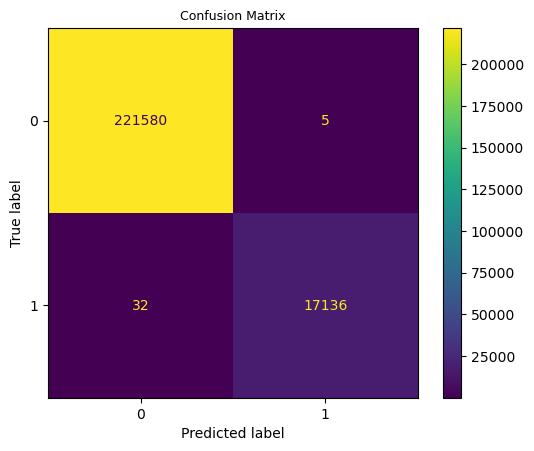

In [59]:
cm = ConfusionMatrixDisplay(cm)
cm.plot()
plt.title('Confusion Matrix',fontsize=9)
plt.show()

In [60]:
print(classification_report(y_test, y_pred,digits=5))

              precision    recall  f1-score   support

           0    0.99986   0.99998   0.99992    221585
           1    0.99971   0.99814   0.99892     17168

    accuracy                        0.99985    238753
   macro avg    0.99978   0.99906   0.99942    238753
weighted avg    0.99985   0.99985   0.99984    238753



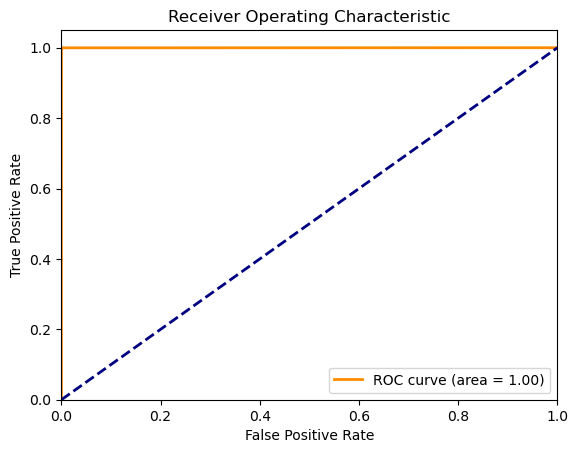

In [61]:
from sklearn.metrics import roc_curve, auc,matthews_corrcoef
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

In [62]:
mcc = matthews_corrcoef(y_test, y_pred)


In [63]:

print("Matthews Correlation Coefficient:", mcc)


Matthews Correlation Coefficient: 0.9988384405442732


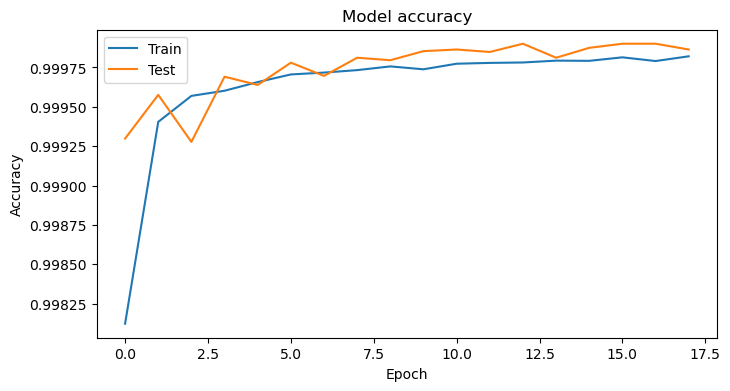

In [64]:
# Plot training & validation accuracy values
plt.figure(figsize= (8, 4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

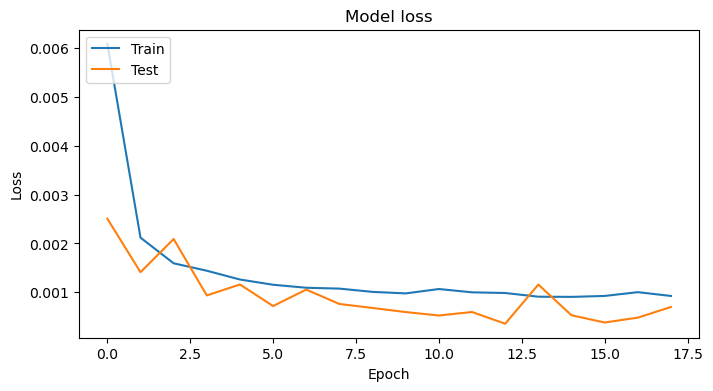

In [65]:
# Plot training & validation loss values
plt.figure(figsize= (8, 4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

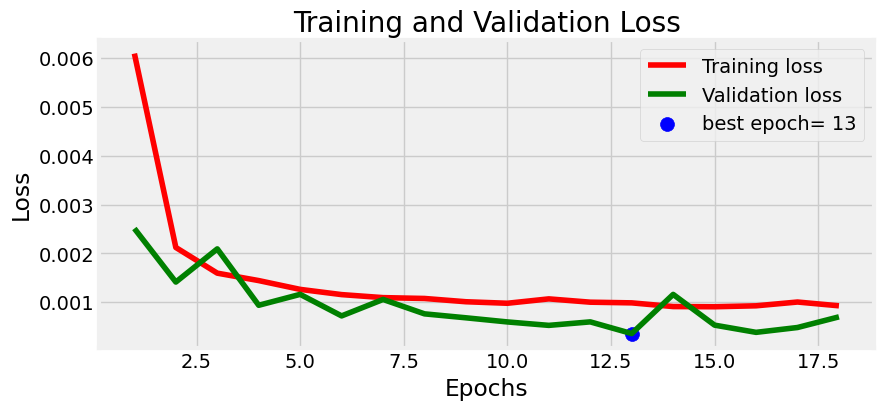

In [66]:
tr_loss = history.history['loss']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

Epochs = [i+1 for i in range(len(tr_loss))]
loss_label = f'best epoch= {str(index_loss + 1)}'

# Plot training history
plt.figure(figsize= (10, 4))
plt.style.use('fivethirtyeight')

plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 100, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()